In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import netCDF4

plt.figure()
nc='/Users/weiyangbao/Downloads/rtofs_glo_3dz_n048_daily_3ztio.nc'

In [2]:
file = netCDF4.Dataset(nc)
lat  = file.variables['Latitude'][:]
lon  = file.variables['Longitude'][:]
data = file.variables['temperature'][0,0,:,:]
file.close()

In [3]:
lon = np.where(np.greater_equal(lon,500),np.nan,lon)

In [4]:
m=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=np.nanmin(lon),urcrnrlon=np.nanmax(lon), \
  llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

In [5]:
x, y = m(lon,lat)

/Users/weiyangbao/miniconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:3394: RuntimeWarning: invalid value encountered in greater
  x = ma.masked_values(np.where(x > 1.e20,1.e20,x), 1.e20)


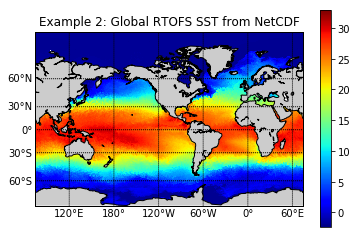

In [6]:
cs = m.pcolor(x,y,data,cmap = plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
colorbar(cs)
plt.title('Example 2: Global RTOFS SST from NetCDF')
plt.show()

In [3]:
colorbar?